In [2]:
import numpy as np
import pandas as pd

In [3]:
netflix = pd.read_csv('NFLX.csv')
netflix.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


# Working With Date Column

In [4]:
netflix['Date'] = pd.to_datetime(netflix['Date'])

In [5]:
netflix['year'] = netflix['Date'].dt.year
netflix['month'] = netflix['Date'].dt.month
netflix['day'] = netflix['Date'].dt.day

In [6]:
netflix.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,2018,2,5
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,2018,2,6
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,2018,2,7


In [7]:
netflix.drop('Date',axis=1,inplace=True)

In [8]:
netflix

,Open,High,Low,Close,Adj Close,Volume,year,month,day
0,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,2018,2,5
1,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,2018,2,6
2,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,2018,2,7
3,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,2018,2,8
4,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,2018,2,9
...,...,...,...,...,...,...,...,...,...
1004,401.970001,427.700012,398.200012,427.140015,427.140015,20047500,2022,1,31
1005,432.959991,458.480011,425.540009,457.130005,457.130005,22542300,2022,2,1
1006,448.250000,451.980011,426.480011,429.480011,429.480011,14346000,2022,2,2
1007,421.440002,429.260010,404.279999,405.600006,405.600006,9905200,2022,2,3


# Asking Six Questions

In [9]:
netflix.shape

(1009, 9)

In [10]:
netflix.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
year         0
month        0
day          0
dtype: int64

In [11]:
netflix.duplicated().sum()

0

In [12]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1009 non-null   float64
 1   High       1009 non-null   float64
 2   Low        1009 non-null   float64
 3   Close      1009 non-null   float64
 4   Adj Close  1009 non-null   float64
 5   Volume     1009 non-null   int64  
 6   year       1009 non-null   int64  
 7   month      1009 non-null   int64  
 8   day        1009 non-null   int64  
dtypes: float64(5), int64(4)
memory usage: 71.1 KB


In [13]:
netflix.describe()

,Open,High,Low,Close,Adj Close,Volume,year,month,day
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03,1009.000000,1009.000000,1009.000000
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06,2019.595639,6.540139,15.717542
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06,1.155997,3.428207,8.759264
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06,2018.000000,1.000000,1.000000
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06,2019.000000,4.000000,8.000000
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06,2020.000000,7.000000,16.000000
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06,2021.000000,10.000000,23.000000
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07,2022.000000,12.000000,31.000000


# EDA

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
corr = netflix.corr()

In [75]:
corr

,Open,High,Low,Close,Adj Close,Volume,year,month,day
Open,1.000000,0.998605,0.998508,0.996812,0.996812,-0.415838,0.809151,0.130646,-0.014462
High,0.998605,1.000000,0.998203,0.998551,0.998551,-0.400699,0.810559,0.129469,-0.015013
Low,0.998508,0.998203,1.000000,0.998544,0.998544,-0.432116,0.809264,0.131444,-0.013412
Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362,0.810160,0.129959,-0.014870
Adj Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362,0.810160,0.129959,-0.014870
Volume,-0.415838,-0.400699,-0.432116,-0.413362,-0.413362,1.000000,-0.401308,-0.115963,0.090775
year,0.809151,0.810559,0.809264,0.810160,0.810160,-0.401308,1.000000,-0.120315,-0.015602
month,0.130646,0.129469,0.131444,0.129959,0.129959,-0.115963,-0.120315,1.000000,0.006903
day,-0.014462,-0.015013,-0.013412,-0.014870,-0.014870,0.090775,-0.015602,0.006903,1.000000


<Axes: >

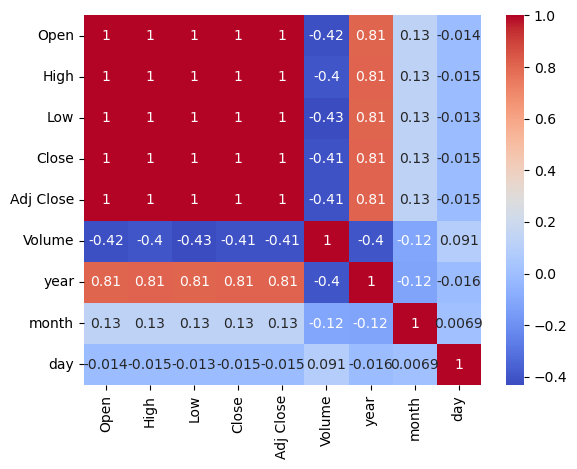

In [17]:
sns.heatmap(corr,annot=True,cmap='coolwarm',cbar=True)

# data scatterness

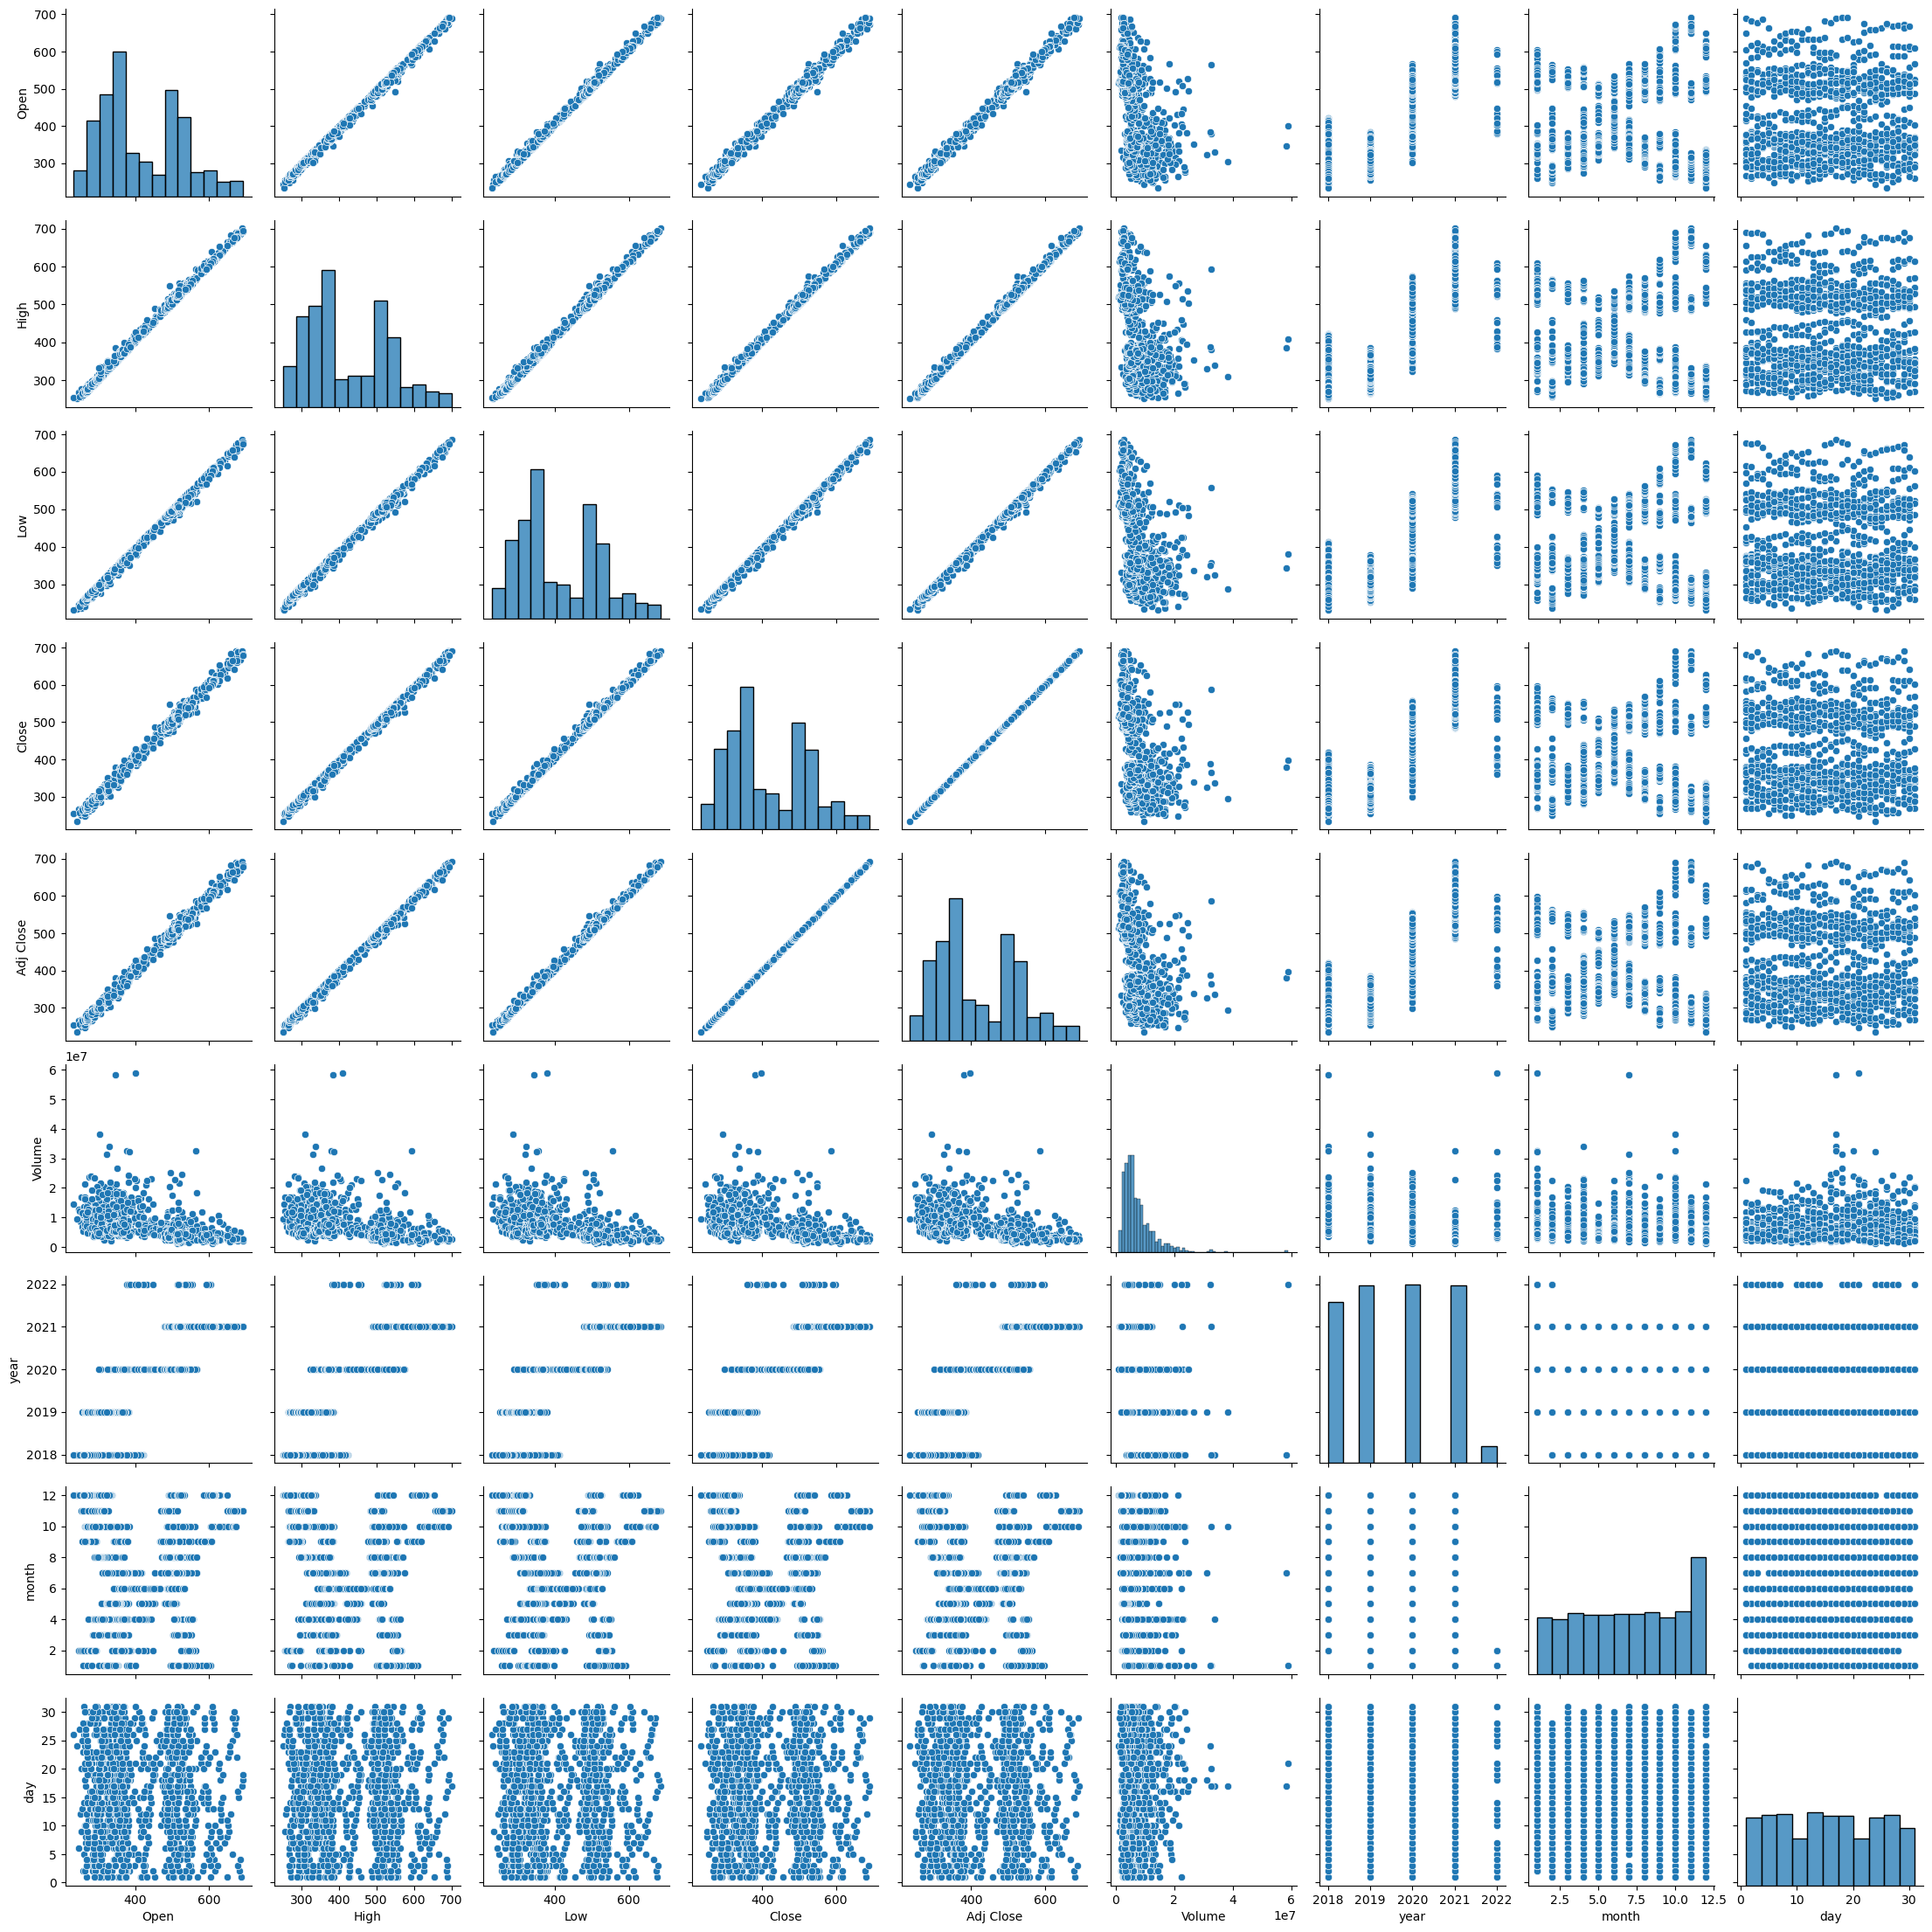

In [18]:
sns.pairplot(netflix)

# Data distribution

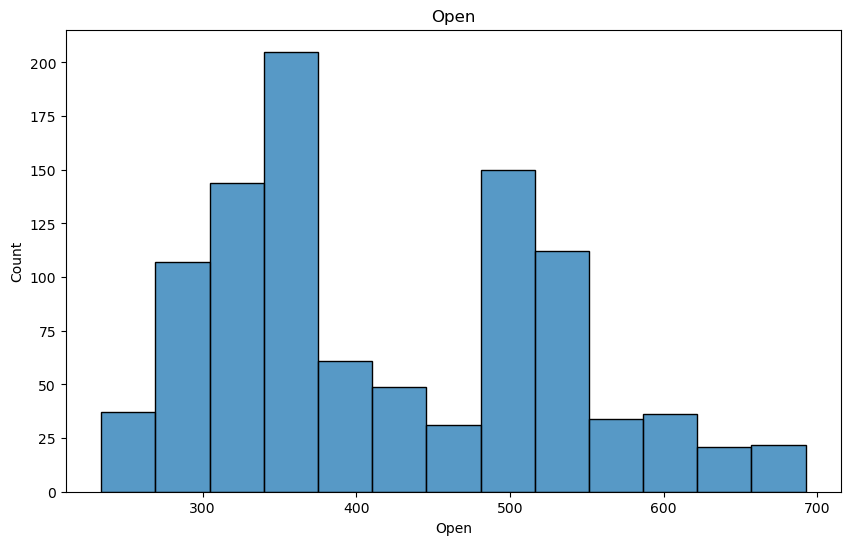

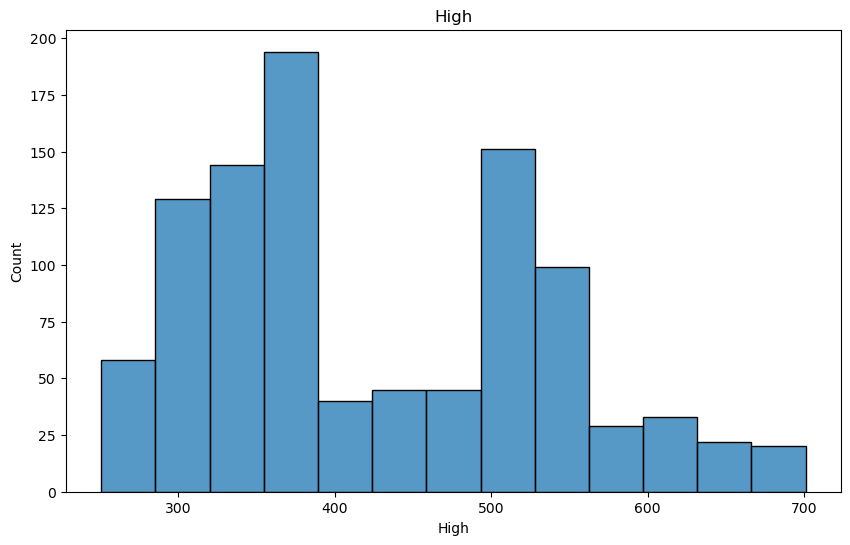

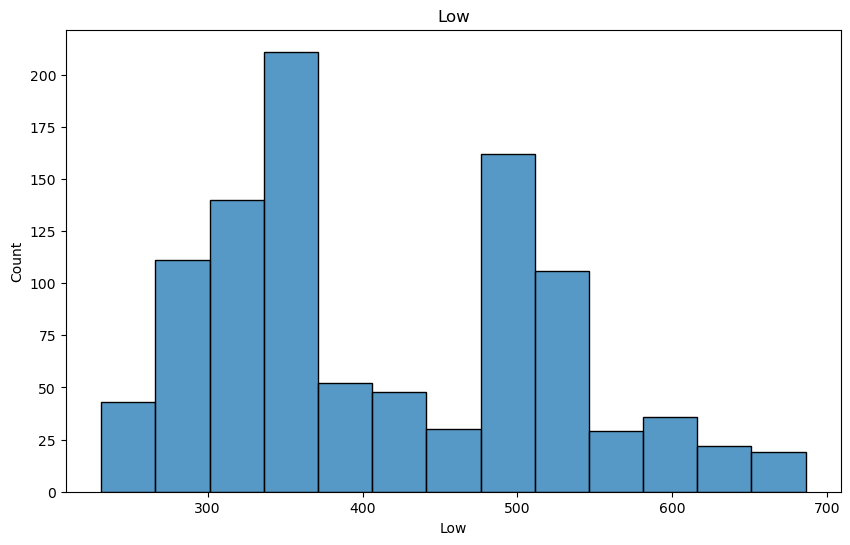

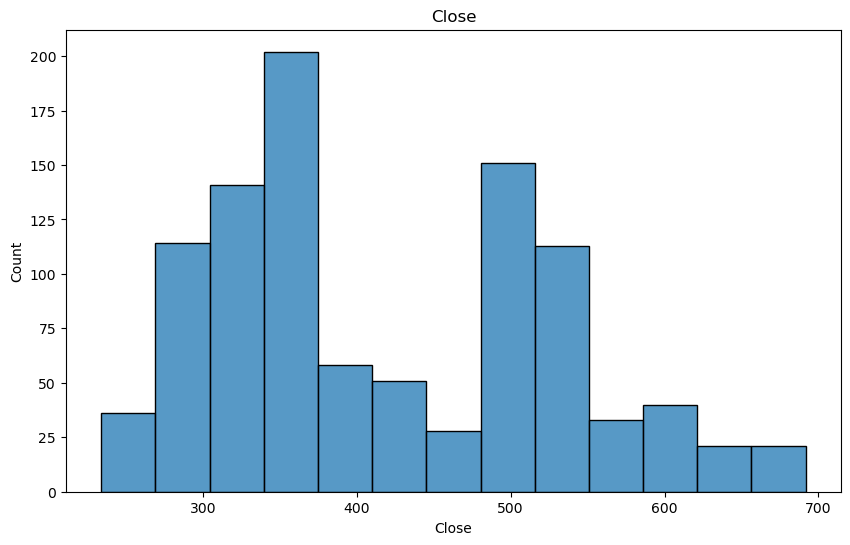

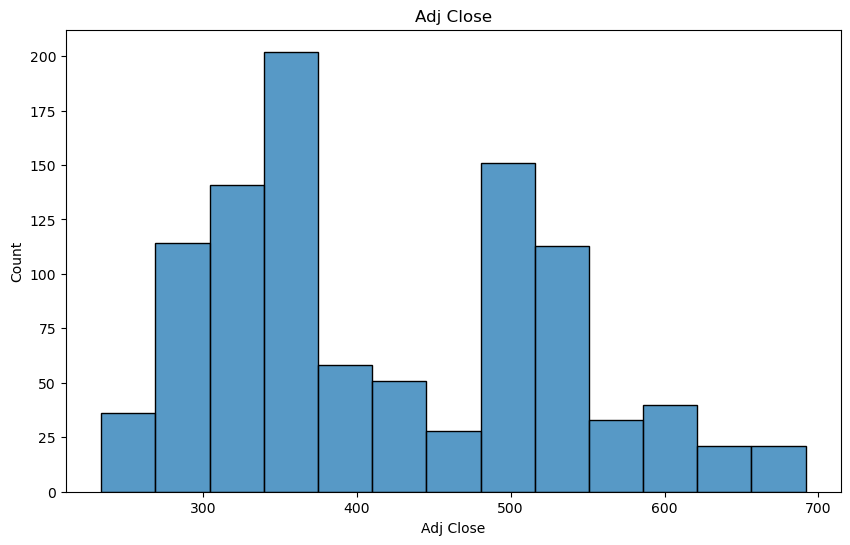

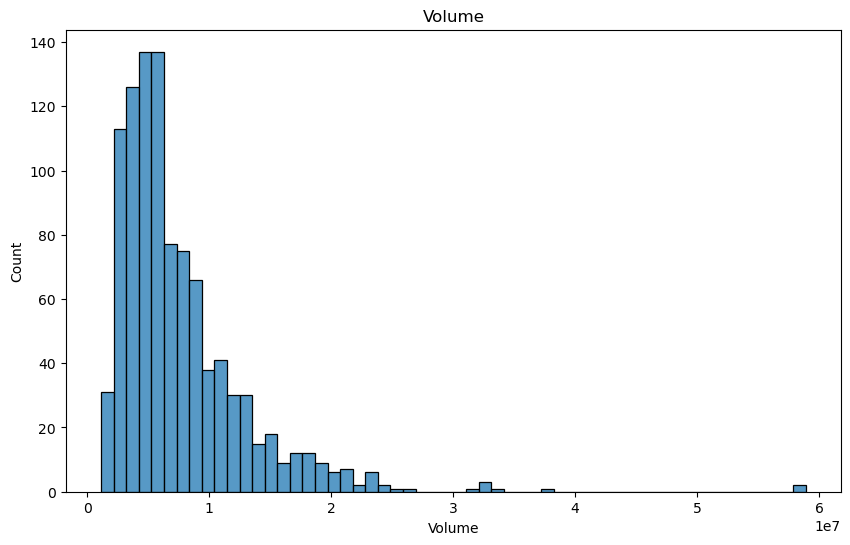

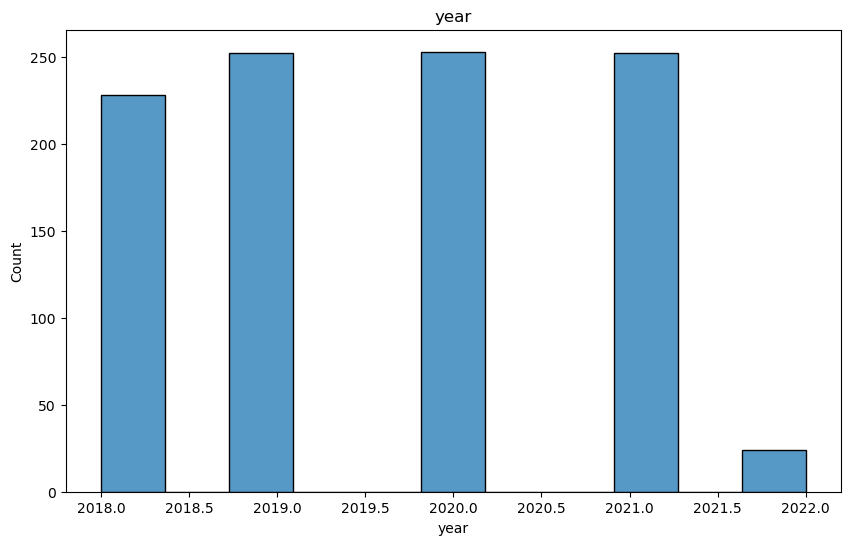

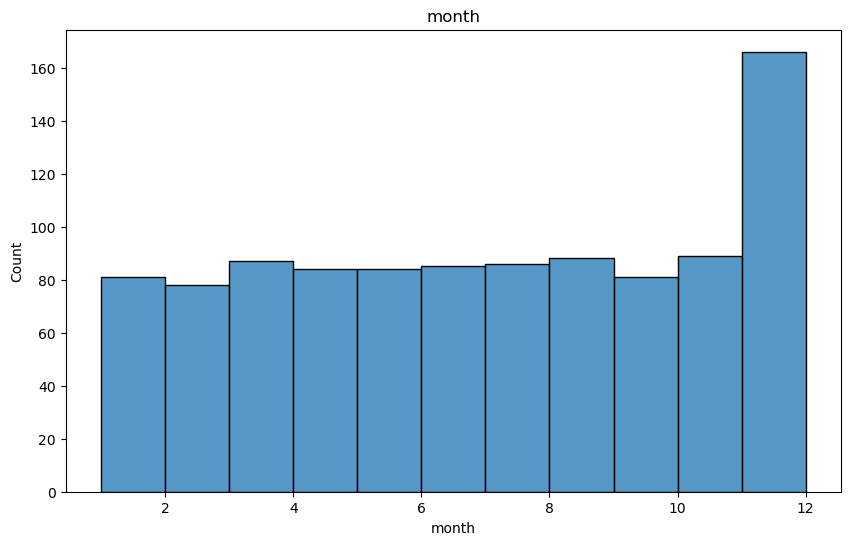

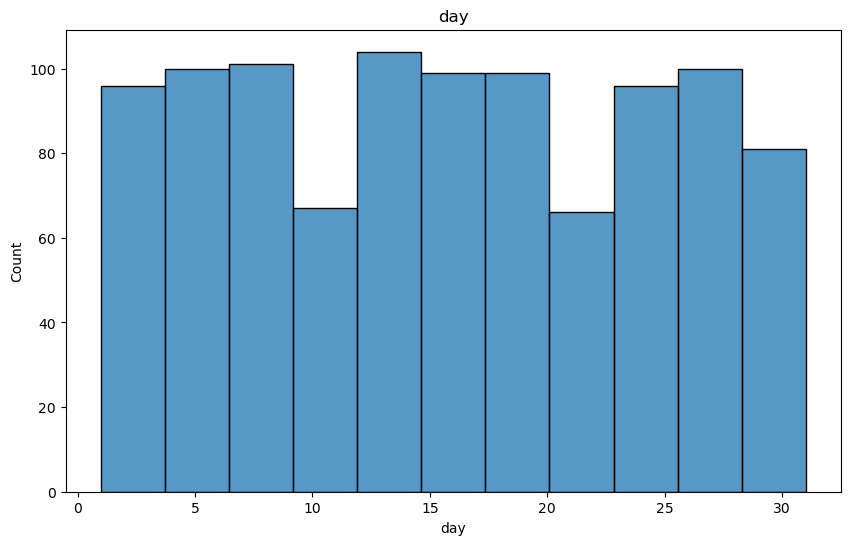

In [78]:
for i in netflix.columns:
    plt.figure(figsize=(10,6))
    sns.histplot(netflix[i])
    plt.title(i)
    plt.show()

# Train Test Split

In [79]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = netflix.drop('Close', axis=1)
y = netflix['Close']

# Perform train-test split without stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

# Verify the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train distribution:\n", y_train.describe())
print("y_test distribution:\n", y_test.describe())


X_train shape: (756, 8)
X_test shape: (253, 8)
y_train distribution:
 count    756.000000
mean     418.411957
std      106.411282
min      246.389999
25%      333.190010
50%      378.955001
75%      509.019997
max      691.690002
Name: Close, dtype: float64
y_test distribution:
 count    253.000000
mean     420.760079
std      113.919266
min      233.880005
25%      325.890015
50%      374.230011
75%      510.299988
max      688.289978
Name: Close, dtype: float64


# Normalizating Data Using StandarScaler

In [80]:
X_train

,Open,High,Low,Adj Close,Volume,year,month,day
241,334.890015,336.880005,321.029999,325.160004,17941400,2019,1,22
886,511.859985,513.000000,507.200012,510.720001,1685700,2021,8,12
906,598.159973,609.450012,593.669983,598.719971,3948000,2021,9,10
107,417.239990,419.440002,413.079987,415.630005,9382900,2018,7,10
757,555.000000,555.000000,543.700012,547.919983,2791700,2021,2,8
...,...,...,...,...,...,...,...,...
534,342.309998,350.489990,332.000000,332.829987,10853800,2020,3,20
584,425.869995,427.589996,419.459991,427.309998,3494800,2020,6,2
493,332.549988,336.299988,323.600006,326.000000,21730000,2020,1,22
527,358.920013,362.980011,344.790009,349.920013,6036000,2020,3,11


In [81]:
from sklearn.preprocessing import StandardScaler
sclr = StandardScaler()

In [82]:
X_train = sclr.fit_transform(X_train)
X_test = sclr.transform(X_test)

In [83]:
X_train

array([[-0.7816832 , -0.81697175, -0.85789829, ..., -0.50973154,
        -1.56267792,  0.71657973],
       [ 0.87784637,  0.82379852,  0.90515223, ...,  1.2067809 ,
         0.48884566, -0.43973676],
       [ 1.68712142,  1.72234676,  1.72403238, ...,  1.2067809 ,
         0.78192046, -0.67100006],
       ...,
       [-0.80362672, -0.82237531, -0.83356004, ...,  0.34852468,
        -1.56267792,  0.71657973],
       [-0.55634275, -0.5738187 , -0.63288838, ...,  0.34852468,
        -0.97652832, -0.55536841],
       [-0.39730103, -0.45326697, -0.4850601 , ..., -1.36798776,
         1.07499525, -1.36478996]])

# Using Regression

In [84]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [85]:
y_pred

array([325.220001, 668.400024, 682.609985, 639.      , 520.799988,
       353.399994, 531.049988, 266.690002, 352.600006, 504.579987,
       507.019989, 588.549988, 482.880005, 517.349976, 286.730011,
       550.789978, 489.049988, 292.859985, 544.530029, 385.029999,
       295.350006, 294.179993, 271.269989, 488.929993, 482.350006,
       319.5     , 617.77002 , 687.400024, 503.859985, 364.579987,
       678.799988, 513.390015, 482.839996, 307.630005, 540.679993,
       436.529999, 486.769989, 482.880005, 289.290009, 439.170013,
       336.299988, 332.670013, 603.349976, 577.76001 , 325.220001,
       327.5     , 426.75    , 424.98999 , 391.429993, 293.119995,
       328.529999, 342.880005, 369.01001 , 518.909973, 466.929993,
       365.359985, 386.      , 365.209991, 281.209991, 290.609985,
       351.339996, 326.459991, 301.829987, 284.25    , 519.200012,
       639.099976, 533.030029, 345.26001 , 688.289978, 523.280029,
       526.27002 , 306.160004, 637.969971, 502.410004, 268.029

# EValuation

In [86]:
from sklearn.metrics import r2_score,mean_squared_error

In [87]:
r2_score(y_test,y_pred)

1.0

In [88]:
mean_squared_error(y_test,y_pred)

5.4917191112555875e-27

# Prediction Model

In [89]:
def pred(Open,High,Low,Adj_Close,Volume,year,month,day):
    features = np.array([[Open,High,Low,Adj_Close,Volume,year,month,day]])
    features = sclr.fit_transform(features)
    prediction = lr.predict(features).reshape(1,-1)
    return prediction[0]

In [90]:
Open = 200.45
High = 250.45
Low  = 150.45
Adj_Close  = 100.34
Volume = 100.45
year = 2020
month = 8
day = 4

res = pred(Open,High,Low,Adj_Close,Volume,year,month,day)

In [91]:
print(res)

[418.41195717]


In [92]:
import pickle
pickle.dump(lr,open('model.pkl','wb'))